In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deep-learning-for-msc-2022-23/example.csv
/kaggle/input/deep-learning-for-msc-2022-23/train.csv
/kaggle/input/deep-learning-for-msc-2022-23/test/14127.png
/kaggle/input/deep-learning-for-msc-2022-23/test/11396.png
/kaggle/input/deep-learning-for-msc-2022-23/test/14260.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12329.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13412.png
/kaggle/input/deep-learning-for-msc-2022-23/test/14325.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13139.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12743.png
/kaggle/input/deep-learning-for-msc-2022-23/test/14990.png
/kaggle/input/deep-learning-for-msc-2022-23/test/10760.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12867.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13570.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12684.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13612.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12204.png
/kagg

# **Model 1 CNN**

# **Step 1: Prepare data loader**

In [3]:
data = pd.read_csv("/kaggle/input/deep-learning-for-msc-2022-23/train.csv")
# len(train_data)
data.head()

,Filename,Label
0,1.png,0
1,2.png,0
2,3.png,0
3,4.png,0
4,5.png,0


In [5]:
print(data['Filename'])

0          1.png
1          2.png
2          3.png
3          4.png
4          5.png
          ...   
7555    7556.png
7556    7557.png
7557    7558.png
7558    7559.png
7559    7560.png
Name: Filename, Length: 7560, dtype: object


In [4]:
from __future__ import print_function, division
import os
# import torch
from skimage import io, transform
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms


# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [6]:
from sklearn.model_selection import train_test_split
train_data, val_data, train_label, val_label = train_test_split(data['Filename'], data['Label'], test_size=0.2, random_state=42)

In [6]:
from tqdm import tqdm
import torch.utils.data as data_utils
from PIL import Image
import glob

transform = transforms.Compose([
    transforms.ToTensor(),           # 将图片转换为tensor
    transforms.Normalize(            # 标准化处理
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
train_set = []
val_set = []
image_path = "/kaggle/input/deep-learning-for-msc-2022-23/train/"
for index, value in tqdm(train_data.iteritems()):
# for i in tqdm(range(len(train_data))):
    path = image_path + value 
    img = Image.open(path)
    tensor = transform(img)
    tul = (tensor, train_label[index])
    train_set.append(tul)

for index, value in tqdm(val_data.iteritems()):
# for i in tqdm(range(len(train_data))):
    path = image_path + value
    img = Image.open(path)
    tensor = transform(img)
    tul = (tensor, val_label[index])
    val_set.append(tul)
    

6048it [00:32, 184.42it/s]
1512it [00:08, 188.15it/s]


In [7]:
import os
test_set = []
test_name = []
test_path = "/kaggle/input/deep-learning-for-msc-2022-23/test/"
file_names = os.listdir(test_path)
for file_name in file_names:
    file_path = os.path.join(test_path, file_name)
    test_name.append(file_name)
    if os.path.isfile(file_path):
        # 对文件进行相应的操作
        img = Image.open(file_path)
        tensor = transform(img)
        test_set.append(tensor)
test_dataloader = data_utils.DataLoader(test_set, batch_size=32, shuffle=True)

# **Step 2: Set and train a CNN neural Network**

In [11]:
!nvidia-smi

Mon Mar 27 10:31:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [8]:
# 创建DataLoader对象
train_dataloader = data_utils.DataLoader(train_set, batch_size=32, shuffle=True)
val_dataloader = data_utils.DataLoader(val_set, batch_size=32, shuffle=True)


In [13]:
print(torch.cuda.is_available())

True


In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns

In [30]:
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #conv layer1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) 

        self.fc1 = nn.Linear(in_features=64*12*12, out_features=128)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)  #using dropout to solve overfit

        self.fc2 = nn.Linear(in_features=128, out_features=4)

        
    def forward(self, x):
        x = self.conv1(x)
#         print('conv1:', x.shape)
        x = self.relu1(x)
        x = self.pool1(x)
#         print('pool1:', x.shape)
        
        x = self.conv2(x)
#         print('conv2:', x.shape)
        x = self.relu2(x)
        x = self.pool2(x)
#         print('pool2:', x.shape)
        
        x = self.conv3(x)
#         print('conv3:', x.shape)
        x = self.relu3(x)
        x = self.pool3(x)
#         print('pool3:', x.shape)
        
        x = x.view(-1, 64*12*12)
        x = self.fc1(x)
#         print('fc1:', x.shape)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
#         print('fc4:', x.shape)

        return x
cnn = CNN()
print(cnn)

CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=4, bias=True)
)


In [31]:
# Hyper Parameters
EPOCH = 30       
LR = 0.0001          
use_cuda = True
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [32]:
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
        
    val_acc = val_correct / val_total
    val_loss /= len(val_loader)
    
    return val_loss, val_acc


In [33]:
cnn_train_loss = []
cnn_val_loss = []
cnn_train_acc = []
cnn_val_acc = []
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
cnn = cnn.to(device)
for epoch in tqdm(range(EPOCH)):
    running_loss = 0.0
    for step, data in enumerate(train_dataloader):   # 分配 batch data, normalize x when iterate train_loader
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = cnn(inputs)
        
        loss = loss_func(outputs, labels)   # cross entropy loss
        optimizer.zero_grad()           # clear gradients for this training step
        loss.backward()                 # backpropagation, compute gradients
        optimizer.step() 
        running_loss += loss.item()
        
    if epoch == 1 or epoch % 10 == 0:
#             print('{} Epoch {}, Training loss {}'.format(
#                 datetime.datetime.now(), epoch, float(running_loss)))
        print('epoch %d loss: %.6f' % (epoch + 1, running_loss / len(train_dataloader)))
    val_loss, val_acc = validate(cnn, val_dataloader, loss_func)
    cnn_val_loss.append(val_loss)
    cnn_val_acc.append(val_acc)
    
    train_loss, train_acc = validate(cnn, train_dataloader, loss_func)
    cnn_train_loss.append(train_loss)
    cnn_train_acc.append(train_acc)
    
        # apply gradients
#         if step % 50 == 0:
#             test_output, last_layer = cnn(test_x)
#             pred_y = torch.max(test_output, 1)[1].data.numpy()
#             accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
#             print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)

  0%|          | 0/30 [00:00<?, ?it/s]

epoch 1 loss: 0.960572


  3%|▎         | 1/30 [00:02<01:03,  2.18s/it]

epoch 2 loss: 0.559975


 33%|███▎      | 10/30 [00:20<00:41,  2.06s/it]

epoch 11 loss: 0.244539


 67%|██████▋   | 20/30 [00:41<00:20,  2.09s/it]

epoch 21 loss: 0.134815


100%|██████████| 30/30 [01:02<00:00,  2.07s/it]


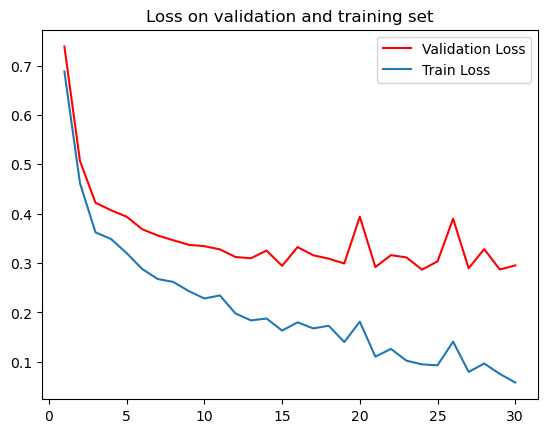

In [36]:
import matplotlib.pyplot as plt
x = [x+1 for x in range(0, 30)]
# 绘制验证集的loss变化图
plt.title('Loss on validation and training set')
plt.plot(x, cnn_val_loss, 'r', label='Validation Loss')
plt.plot(x, cnn_train_loss, label='Train Loss')
plt.legend()
plt.show()


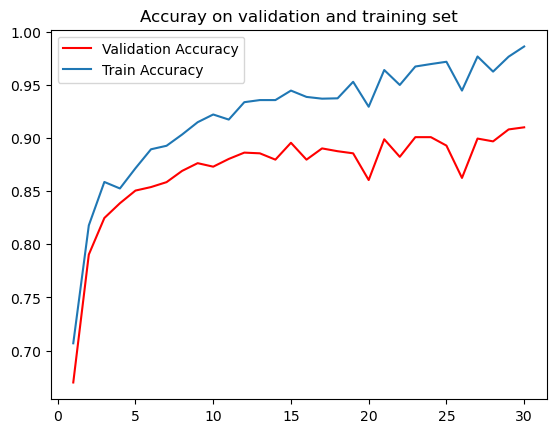

In [37]:
import matplotlib.pyplot as plt
x = [x+1 for x in range(0, 30)]
# 绘制验证集的loss变化图
plt.title('Accuray on validation and training set')
plt.plot(x,cnn_val_acc, 'r', label='Validation Accuracy')
plt.plot(x, cnn_train_acc, label='Train Accuracy')
plt.legend()
plt.show()

It can be seen that with epoch increasing, the curve in two figures indicates the problem of overfitting, which causes accuracy on training dataset accessing 100%, but 10% lower on validation dataset. And the curve are jagged, not smooth.
Since the dataset is spilt randomly, it is probably caused by the complexity of CNN, 8 layers of combination of conv+maxpool+flatten may be too complex. Or the learning rate is too high. Or batch_size = 32 is still not big enough.

# **Step 3: make prediction on train and validation data**

In [38]:
correct = 0
total = 0
cnn.eval()
train_result = []
train_label = []
with torch.no_grad():
    for data in train_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for pre, label in zip(predicted.cpu(), labels.cpu()):
            train_result.append(pre)
            train_label.append(label)
        
print('Accuracy of the network on the train images: %4f %%' % (100 * correct / total))

Accuracy of the network on the train images: 98.611111 %


In [39]:
correct = 0
total = 0
cnn.eval()
result = []
vallabel = []
with torch.no_grad():
    for data in val_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for pre, label in zip(predicted.cpu(), labels.cpu()):
            result.append(pre)
            vallabel.append(label)
print('Accuracy of the network on the validation images: %4f %%' % (100 * correct / total))

Accuracy of the network on the validation images: 91.005291 %


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

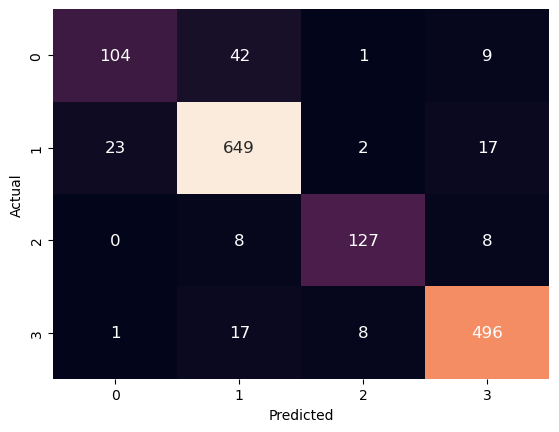

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np

all_labels = [0,1,2,3]
labels_predict = result

def plotConfusionMatrix(vallabel, labels_predict):
  x = confusion_matrix(vallabel, labels_predict)
  plot = sn.heatmap(np.array(x), 
                    annot=True, 
                    annot_kws={"size": 12}, 
                    fmt='g', 
                    cbar=False,
                    xticklabels=all_labels, 
                    yticklabels=all_labels)
  plot.set(xlabel='Predicted', ylabel='Actual')
  return plot

plotConfusionMatrix(vallabel, labels_predict)

1. Normal epithelial cell nuclei with label 0.
2. Cancer epithelial cell nuclei with label 1.
3. Muscle cell nuclei with label 2.
4. Immune leukocyte cell nuclei with label 3.

In the confusion matrix, the most serious problem is on the column "1" that some canser cell nucleis are recognised as other healthy cells, expecially the normal epithelial cell, which would be a issue that a canser carrier is diagnosed as healthy person. And normal cell are more likely to be recognised as canser cell than the other two, which would misdiagnose a healthy person.

In [41]:
!pip install captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.8 MB/s eta 0:00:0000:010:01


In [42]:
import torch
import torch.nn.functional as F

import urllib
from PIL import Image

import os
import json
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import torchvision
from torchvision import models
from torchvision import transforms

from captum.attr import IntegratedGradients
from captum.attr import GradientShap
from captum.attr import Occlusion
from captum.attr import NoiseTunnel
from captum.attr import visualization as viz

In [45]:
batch = next(iter(train_dataloader))
images, labels = batch
integrated_gradients = IntegratedGradients(cnn.cpu())
attributions_ig = integrated_gradients.attribute(images, target=labels.long())

In [54]:
np.shape(attributions_ig.squeeze().cpu().detach().numpy())

(32, 3, 100, 100)

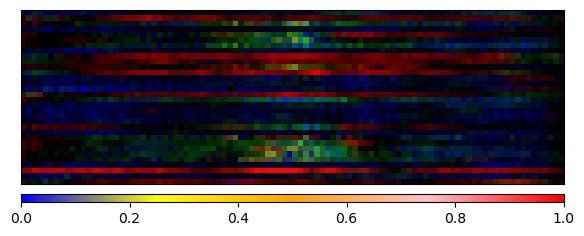

In [160]:
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
        [(0, 'blue'),
        (0.25, 'yellow'),
         (0.5, 'orange'),
         (0.75, 'pink'),
        (1, 'red')], N=256)

_ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (0, 2, 3, 1)),
                             np.transpose(images.squeeze().cpu().detach().numpy(), (0, 2, 3, 1)),
                             method='heat_map',
                             cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             outlier_perc=1,
                             fig_size=(7, 7)
                            )


In [80]:
print(len(test_dataloader))

158


In [49]:

cnn.to(device)
cnn.eval()
test_result = []
with torch.no_grad():
    for data in test_dataloader:
        inputs = data
        inputs = inputs.to(device)
        outputs = cnn(inputs)
        _, predicted = torch.max(outputs, 1)
#         for item, label in zip(data.cpu(), predicted.cpu()):
#             test_name.append(item)
#             test_result.append(label)
        test_result.extend(predicted.cpu().numpy().tolist())

In [50]:
print(test_name[:10])
print(len(test_result))

['14127.png', '11396.png', '14260.png', '12329.png', '13412.png', '14325.png', '13139.png', '12743.png', '14990.png', '10760.png']
5041


In [51]:
df = pd.DataFrame(test_result)
df_name = pd.DataFrame(test_name)
df = pd.concat([df_name,df], axis = 1, ignore_index = True)
df.rename(columns={0:"Filename", 1:"Label"}, inplace=True)
print(df)

       Filename  Label
0     14127.png      1
1     11396.png      1
2     14260.png      1
3     12329.png      1
4     13412.png      1
...         ...    ...
5036  13785.png      1
5037  13283.png      1
5038  14735.png      1
5039  12060.png      1
5040  14107.png      1

[5041 rows x 2 columns]


In [95]:
# df.to_csv("submission.csv", index=False)

# **Step 4: Tune with Ray**

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self , l1=120, l2=84):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) 
        
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) 

        self.fc1 = nn.Linear(in_features=64*12*12, out_features=128)
        self.relu4 = nn.ReLU()

        self.fc2 = nn.Linear(in_features=128, out_features=4)

        
    def forward(self, x):
        x = self.conv1(x)
#         print('conv1:', x.shape)
        x = self.relu1(x)
        x = self.pool1(x)
#         print('pool1:', x.shape)
        
        x = self.conv2(x)
#         print('conv2:', x.shape)
        x = self.relu2(x)
        x = self.pool2(x)
#         print('pool2:', x.shape)
        
        x = self.conv3(x)
#         print('conv3:', x.shape)
        x = self.relu3(x)
        x = self.pool3(x)
#         print('pool3:', x.shape)
        
        x = x.view(-1, 64*12*12)
        x = self.fc1(x)
#         print('fc1:', x.shape)
        x = self.relu4(x)

        x = self.fc2(x)
#         print('fc4:', x.shape)

        return x


In [ ]:
import multiprocessing

print("CPU核心数量：", multiprocessing.cpu_count())

In [ ]:
!pip install ray

from functools import partial
import numpy as np
import os
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [ ]:
def cross_validation():
    data = pd.read_csv("/kaggle/input/deep-learning-for-msc-2022-23/train.csv")
    train_data, val_data, train_label, val_label = train_test_split(data['Filename'], data['Label'], test_size=0.2, random_state=42)
    
    transform = transforms.Compose([
        transforms.ToTensor(),           # 将图片转换为tensor
        transforms.Normalize(            # 标准化处理
         mean=[0.485, 0.456, 0.406],
         std=[0.229, 0.224, 0.225]
        )
    ])
    train_set = []
    val_set = []
    image_path = "/kaggle/input/deep-learning-for-msc-2022-23/train/"
    for index, value in tqdm(train_data.iteritems()):
        path = image_path + value 
        img = Image.open(path)
        tensor = transform(img)
        tul = (tensor, train_label[index])
        train_set.append(tul)
        
    for index, value in tqdm(val_data.iteritems()):
        path = image_path + value
        img = Image.open(path)
        tensor = transform(img)
        tul = (tensor, val_label[index])
        val_set.append(tul)
#     train_dataloader = data_utils.DataLoader(train_set, batch_size=32, shuffle=True)
#     val_dataloader = data_utils.DataLoader(val_set, batch_size=32, shuffle=True)
    
    return {"train":train_set, "val":val_set}

In [ ]:
def train_cnn(config, checkpoint_dir=None):
    net = Net(config["l1"], config["l2"])
  #这一部分是多GPU并行训练
#     device = "cpu"
#     if torch.cuda.is_available():
#         device = "cuda:0"
#         if torch.cuda.device_count() > 1:
#             net = nn.DataParallel(net)
    net.to(device)
  #决定损失函数和optimiser
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=config["lr"]) 
#     optimizer = optim.SGD(net.parameters(), lr=config["lr"], momentum=0.9)
  #更新检查点信息
    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)
    
    data = cross_validation()
    train_subset = data["train"]
    val_subset = data["val"]

    #训练模型
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config["batch_size"]),  #参数调优目标1
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=2)

    for epoch in range(100):  # loop over the dataset multiple times
        running_loss = 0.0
        epoch_steps = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)

            #计算损失函数
            loss = criterion(outputs, labels)
            #backpropagation
            loss.backward()
            #调优
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            epoch_steps += 1
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                running_loss / epoch_steps))
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        val_steps = 0
        total = 0
        correct = 0
        for i, data in enumerate(valloader, 0):
            with torch.no_grad():   
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()
                val_steps += 1

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(loss=(val_loss / val_steps), accuracy=correct / total)
    print("Finished Training")

In [ ]:
def test_accuracy(net, device="cpu"):
    data = cross_validation()
    testset = data["val"]
    
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=16, shuffle=False, num_workers=2)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [ ]:
def main(num_samples=20, max_num_epochs=100, gpus_per_trial=2):
    config = {
        "l1": tune.sample_from(lambda _: 2**np.random.randint(-3,3)),
        "l2": tune.sample_from(lambda _: 2**np.random.randint(-3, 3)),
        "lr": tune.loguniform(1e-4, 1e-6),
        "batch_size": tune.choice([16, 32, 64])
    }
    scheduler = ASHAScheduler(
        metric="loss",
        mode="min",
        max_t=max_num_epochs,
        grace_period=1,
        reduction_factor=2)
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "accuracy", "training_iteration"])
    result = tune.run(
        partial(train_cnn),
        resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
        config=config,
        num_samples=num_samples,
        scheduler=scheduler,
        progress_reporter=reporter)

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation loss: {}".format(
        best_trial.last_result["loss"]))
    print("Best trial final validation accuracy: {}".format(
        best_trial.last_result["accuracy"]))

    best_trained_model = Net(best_trial.config["l1"], best_trial.config["l2"])
#     device = "cpu"
#     if torch.cuda.is_available():
#         device = "cuda:0"
#         if gpus_per_trial > 1:
#             best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.dir_or_data
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_acc = test_accuracy(best_trained_model, device)
    print("Best trial test set accuracy: {}".format(test_acc))

    return result

if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=2, max_num_epochs=300, gpus_per_trial=2)

# **Model 2 RESNET18**

In [17]:

import torch
import torch.nn.functional as F
import torch.optim as optim
import urllib
from PIL import Image
import pandas as pd
import os
import json
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

import torchvision
from torchvision import models
from torchvision import transforms
from tqdm import tqdm
import torch.utils.data as data_utils
from PIL import Image

In [37]:
# Define the dataset class:
# load and preprocess the dataset:
data2 = pd.read_csv('/kaggle/input/deep-learning-for-msc-2022-23/train.csv')
train_data2, val_data2, train_label2, val_label2 = train_test_split(data2['Filename'], data2['Label'], test_size=0.2, stratify=data2["Label"])

transform = transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),           # image to tensor
#     transforms.Normalize(            
#         mean=[0.485, 0.456, 0.406],
#         std=[0.229, 0.224, 0.225]
#     )
    transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(15),
#     transforms.RandomResizedCrop(100, scale=(0.8, 1.2), ratio=(0.9, 1.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
])

train_set2 = []
val_set2 = []
image_path = "/kaggle/input/deep-learning-for-msc-2022-23/train/"
for index, value in tqdm(train_data2.iteritems()):
    path = image_path + value 
    img = Image.open(path)
    tensor = transform(img)
    tul = (tensor, train_label2[index])
    train_set2.append(tul)

for index, value in tqdm(val_data2.iteritems()):
    path = image_path + value
    img = Image.open(path)
    tensor = transform(img)
    tul = (tensor, val_label2[index])
    val_set2.append(tul)
    
train_dataloader = DataLoader(train_set2, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_set2, batch_size=32, shuffle=False)

6048it [00:18, 325.41it/s]
1512it [00:04, 346.24it/s]


In [31]:
def validate(model, val_loader, criterion):
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
        
    val_acc = val_correct / val_total
    val_loss /= len(val_loader)
    
    return val_loss, val_acc


In [40]:
# Initialize the model, loss function, and optimizer:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model.to(device)

import torchvision.models as models
model2 = models.resnet18(pretrained=True)
# for param in model2.parameters():
#     param.requires_grad = False
model2.fc = nn.Linear(model2.fc.in_features, 4)
model2 = model2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

res_train_loss = []
res_train_acc = []
res_val_loss = []
res_val_acc = []

for epoch in range(100):
    running_loss = 0.0
    model2.train()
    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    running_loss /= len(train_dataloader)
    res_train_loss.append(running_loss)

    # Validation of model
    val_loss, val_acc = validate(model2, val_dataloader, criterion)
    res_val_loss.append(val_loss)
    res_val_acc.append(val_acc)
    
    train_loss, train_acc = validate(model2, train_dataloader, criterion)
    res_train_acc.append(train_acc)

#     if epoch == 1 or epoch % 5 == 0:
    print(f"Epoch: {epoch + 1}/{50}, Train Loss: {train_loss:.6f}, Train Accuracy: {train_acc:.6f}, Val Loss: {val_loss:.6f}, Val Accuracy: {val_acc:.6f}")

Epoch: 1/50, Train Loss: 0.294992, Train Accuracy: 0.891369, Val Loss: 0.303592, Val Accuracy: 0.884259
Epoch: 2/50, Train Loss: 1.097151, Train Accuracy: 0.641865, Val Loss: 1.130863, Val Accuracy: 0.641534
Epoch: 3/50, Train Loss: 0.307611, Train Accuracy: 0.877646, Val Loss: 0.419174, Val Accuracy: 0.844577
Epoch: 4/50, Train Loss: 0.202827, Train Accuracy: 0.927414, Val Loss: 0.318929, Val Accuracy: 0.890873
Epoch: 5/50, Train Loss: 0.180975, Train Accuracy: 0.940972, Val Loss: 0.349773, Val Accuracy: 0.893519
Epoch: 6/50, Train Loss: 0.028551, Train Accuracy: 0.991567, Val Loss: 0.170083, Val Accuracy: 0.951058
Epoch: 7/50, Train Loss: 0.059324, Train Accuracy: 0.979993, Val Loss: 0.220691, Val Accuracy: 0.941138
Epoch: 8/50, Train Loss: 0.265009, Train Accuracy: 0.913360, Val Loss: 0.521206, Val Accuracy: 0.856481
Epoch: 9/50, Train Loss: 0.162523, Train Accuracy: 0.950066, Val Loss: 0.408232, Val Accuracy: 0.884921
Epoch: 10/50, Train Loss: 0.043445, Train Accuracy: 0.984954, Va

In [191]:
# model = models.resnet18(pretrained=True)
# fc_in_features = model.fc.in_features
# # for param in model.parameters():
# #     param.requires_grad = False
# model.fc = nn.Linear(fc_in_features, 4)

In [ ]:
# if torch.cuda.is_available():
#     device = "cuda"
#     if torch.cuda.device_count() > 1:
#         resnet32 = nn.DataParallel(resnet32)
# resnet32.to(device)

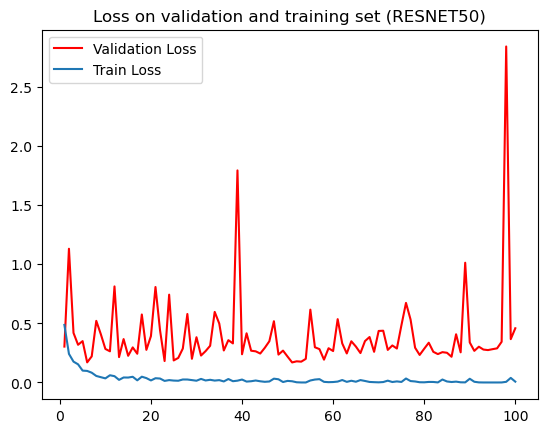

In [42]:
import matplotlib.pyplot as plt
x = [x+1 for x in range(0, 100)]
plt.title('Loss on validation and training set (RESNET50)')
plt.plot(x, res_val_loss, 'r', label='Validation Loss')
plt.plot(x, res_train_loss, label='Train Loss')
plt.legend()
plt.show()

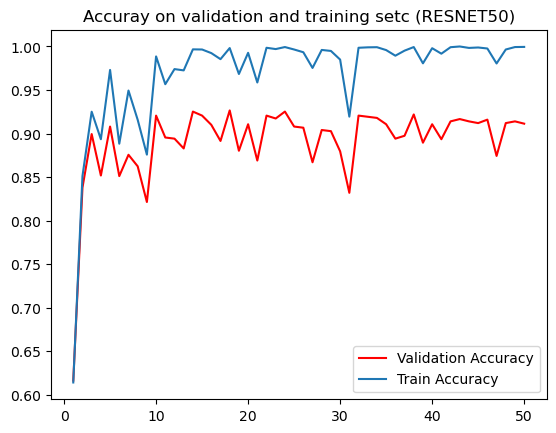

In [29]:
import matplotlib.pyplot as plt
x = [x+1 for x in range(0, 50)]
# 绘制验证集的loss变化图
plt.title('Accuray on validation and training setc (RESNET50)')
plt.plot(x,res_val_acc, 'r', label='Validation Accuracy')
plt.plot(x, res_train_acc, label='Train Accuracy')
plt.legend()
plt.show()

In [22]:
correct = 0
total = 0
model2.eval()
with torch.no_grad():
    for data in train_loader2:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the train images: %4f %%' % (100 * correct / total))

Accuracy of the network on the train images: 99.966931 %


In [31]:
correct = 0
total = 0
model2.eval()
res_result = []
res_vallabel = []
with torch.no_grad():
    for data in val_dataloader:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model2(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for pre, label in zip(predicted.cpu(), labels.cpu()):
            res_result.append(pre)
            res_vallabel.append(label)
print('Accuracy of the network on the validation images: %4f %%' % (100 * correct / total))

Accuracy of the network on the validation images: 95.833333 %


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

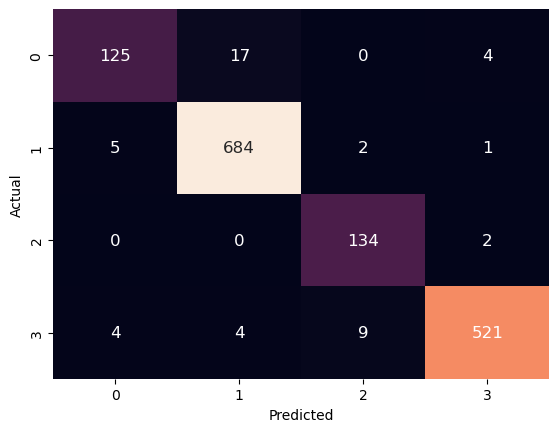

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import numpy as np

all_labels = [0,1,2,3]
labels_predict2 = res_result

def plotConfusionMatrix(res_vallabel, labels_predict2):
  x = confusion_matrix(res_vallabel, labels_predict2)
  plot = sn.heatmap(np.array(x), 
                    annot=True, 
                    annot_kws={"size": 12}, 
                    fmt='g', 
                    cbar=False,
                    xticklabels=all_labels, 
                    yticklabels=all_labels)
  plot.set(xlabel='Predicted', ylabel='Actual')
  return plot

plotConfusionMatrix(res_vallabel, labels_predict2)

The prediction on validation set is better than CNN, but still so many cancer cells being recognised as normal cell. 

# **Step 4: Tune with Ray**

In [ ]:
def train_resnet(config, checkpoint_dir=None):
    net = model
#     net = Net(config["l1"], config["l2"])
  #这一部分是多GPU并行训练
#     device = "cpu"
#     if torch.cuda.is_available():
#         device = "cuda:0"
#         if torch.cuda.device_count() > 1:
#             net = nn.DataParallel(net)
    net.to(device)
  #决定损失函数和optimiser
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=config["lr"]) 
#     optimizer = optim.SGD(net.parameters(), lr=config["lr"], momentum=0.9)
  #更新检查点信息
    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)
    
    data = cross_validation()
    train_subset = data["train"]
    val_subset = data["val"]

    #训练模型
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config["batch_size"]),  #参数调优目标1
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config["batch_size"]),
        shuffle=True,
        num_workers=2)

    for epoch in range(100):  # loop over the dataset multiple times
        running_loss = 0.0
        epoch_steps = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)

            #计算损失函数
            loss = criterion(outputs, labels)
            #backpropagation
            loss.backward()
            #调优
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            epoch_steps += 1
            if i % 2000 == 1999:  # print every 2000 mini-batches
                print("[%d, %5d] loss: %.3f" % (epoch + 1, i + 1,
                running_loss / epoch_steps))
                running_loss = 0.0

        # Validation loss
        val_loss = 0.0
        val_steps = 0
        total = 0
        correct = 0
        for i, data in enumerate(valloader, 0):
            with torch.no_grad():   
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()
                val_steps += 1

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(loss=(val_loss / val_steps), accuracy=correct / total)
    print("Finished Training")

In [ ]:
def test_accuracy(net, device="cpu"):
    data = cross_validation()
    testset = data["val"]
    
    testloader = torch.utils.data.DataLoader(
        testset, batch_size=16, shuffle=False, num_workers=2)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [ ]:
def main(num_samples=20, max_num_epochs=100, gpus_per_trial=2):
    config = {
        "lr": tune.loguniform(1e-5, 1e-2),
        "batch_size": tune.choice([8, 16, 32, 64])
    }
    scheduler = ASHAScheduler(
        metric="loss",
        mode="min",
        max_t=max_num_epochs,
        grace_period=1,
        reduction_factor=2)
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "accuracy", "training_iteration"])
    result = tune.run(
        partial(train_cnn),
        resources_per_trial={"cpu": 2, "gpu": gpus_per_trial},
        config=config,
        num_samples=num_samples,
        scheduler=scheduler,
        progress_reporter=reporter)

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation loss: {}".format(
        best_trial.last_result["loss"]))
    print("Best trial final validation accuracy: {}".format(
        best_trial.last_result["accuracy"]))

#     best_trained_model = Net(best_trial.config["l1"], best_trial.config["l2"])
    best_trained_model = model
#     device = "cpu"
#     if torch.cuda.is_available():
#         device = "cuda:0"
#         if gpus_per_trial > 1:
#             best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.dir_or_data
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_acc = test_accuracy(best_trained_model, device)
    print("Best trial test set accuracy: {}".format(test_acc))


# if __name__ == "__main__":
#     # You can change the number of GPUs per trial here:
#     main(num_samples=2, max_num_epochs=10, gpus_per_trial=2)

In [32]:
import tqdm
import os
test_set = []
test_name = []
test_path = "/kaggle/input/deep-learning-for-msc-2022-23/test/"
file_names = os.listdir(test_path)
for file_name in file_names:
    file_path = os.path.join(test_path, file_name)
    print(file_path)
    pass
    test_name.append(file_name)
    if os.path.isfile(file_path):
        img = Image.open(file_path)
        tensor = transform(img)
        test_set.append(tensor)
test_dataloader = data_utils.DataLoader(test_set, batch_size=32, shuffle=True)

/kaggle/input/deep-learning-for-msc-2022-23/test/14127.png
/kaggle/input/deep-learning-for-msc-2022-23/test/11396.png
/kaggle/input/deep-learning-for-msc-2022-23/test/14260.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12329.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13412.png
/kaggle/input/deep-learning-for-msc-2022-23/test/14325.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13139.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12743.png
/kaggle/input/deep-learning-for-msc-2022-23/test/14990.png
/kaggle/input/deep-learning-for-msc-2022-23/test/10760.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12867.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13570.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12684.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13612.png
/kaggle/input/deep-learning-for-msc-2022-23/test/12204.png
/kaggle/input/deep-learning-for-msc-2022-23/test/13159.png
/kaggle/input/deep-learning-for-msc-2022-23/test/10188.p

In [ ]:
len(test_name)

In [19]:
test_result_18 = []

with torch.no_grad():
    model2.eval()
    for data in test_dataloader:
        inputs = data
        inputs = inputs.to(device)
        outputs = model2(inputs)
        _, predicted = torch.max(outputs.data, 1)

        test_result_18.extend(predicted.cpu().numpy().tolist())

In [22]:
dataframe = pd.DataFrame(test_result_18)
dataframe2 = pd.DataFrame(test_name)

In [23]:
dataframe2 = pd.concat([dataframe2,dataframe], axis = 1, ignore_index = True)
dataframe2.rename(columns={0:"Filename", 1:"Label"}, inplace=True)

In [24]:
dataframe2.to_csv("submission.csv", index=False)

From output below, even the model do well on validation set, but still has problems. 

In [25]:
print(test_result_18)

[2, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 2, 1, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 2, 3, 1, 2, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 0, 1, 1, 3, 2, 3, 1, 3, 3, 1, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 0, 1, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 0, 1, 1, 3, 3, 1, 3, 1, 3, 1, 1, 2, 0, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 0, 3, 1, 3, 2, 3, 1, 1, 1, 1, 3, 0, 1, 1, 3, 3, 3, 2, 3, 3, 0, 3, 3, 1, 3, 3, 1, 2, 2, 1, 3, 2, 1, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 0, 1, 3, 3, 0, 1, 1, 1, 2, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 3, 1, 0, 3, 3, 3, 2, 1, 1, 3, 0, 0, 3, 3, 1, 2, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 2, 3, 3, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 1, 2, 2, 2, 1, 3, 3, 1, 0, 3, 3, 1, 0, 1, 3, 3, 1, 2, 1, 1, 3, 3, 1, 3, 1, 2, 2, 3, 1, 1, 0, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 2, 1, 3, 

In [45]:
batch = next(iter(train_dataloader))
images, labels = batch
integrated_gradients = IntegratedGradients(model2.cpu())
attributions_ig = integrated_gradients.attribute(images, target=labels.long())

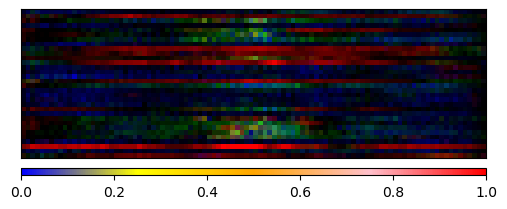

In [62]:
default_cmap = LinearSegmentedColormap.from_list('custom blue', 
        [(0, 'blue'),
        (0.25, 'yellow'),
         (0.5, 'orange'),
         (0.75, 'pink'),
        (1, 'red')], N=256)

_ = viz.visualize_image_attr(np.transpose(attributions_ig.squeeze().cpu().detach().numpy(), (0, 2, 3, 1)),
                             np.transpose(images.squeeze().cpu().detach().numpy(), (0, 2, 3, 1)),
                             method='heat_map',
                             cmap=default_cmap,
                             show_colorbar=True,
                             sign='positive',
                             outlier_perc=1
                            
                            )


In [14]:
# transform = transforms.Compose([
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(15),
#     transforms.RandomResizedCrop(100, scale=(0.8, 1.2), ratio=(0.9, 1.1)),
#     transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
#     transforms.ToTensor(),
# ])
# make predictions on the test set
class TestDataset(Dataset):
    def __init__(self, path, transform=None):
        self.path = path
        self.transform = transform
        self.filenames = os.listdir(path)

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, index):
        path = os.path.join(self.path, self.filenames[index])
        image = Image.open(path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, self.filenames[index]

test_dataset = TestDataset('/kaggle/input/deep-learning-for-msc-2022-23/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

submission = {'Filename': [], 'Label': []}

with torch.no_grad():
    model2.eval()
    for images, filenames in test_loader:
        images = images.to(device)
        outputs = model2(images)
        _, predicted = torch.max(outputs.data, 1)
        submission['Filename'].extend(filenames)
        submission['Label'].extend(predicted.cpu().numpy())

submission_df = pd.DataFrame(submission)
submission_df.to_csv("model2_sub_2.csv", index=False)